Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and   draw inferences.  

Data Description:  
Murder -- Muder rates in different places of United States  
Assualt- Assualt rate in different places of United States  
UrbanPop - urban population in different places of United States  
Rape - Rape rate in different places of United States  


In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data analysis

In [319]:
crime=pd.read_csv('crime_data.csv')

In [320]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [321]:
crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [322]:
crime.rename(columns={'Unnamed: 0':'City'},inplace=True)

In [323]:
crime.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [324]:
X=crime.iloc[:,1:]

In [325]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# Elbow Method 
##### Selecting Number of Cluster 

In [326]:
from sklearn.cluster import KMeans
kmeans=KMeans()

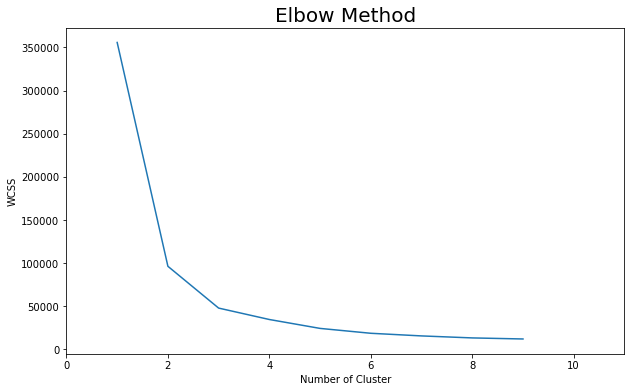

In [327]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss)
plt.xlim(0,11)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method',{'fontsize': 20,'fontweight': 50});

__We can take 3 and 5 as the number of clusters which every will give the better insight about the data.__

__Here I have taken 5 as the number of cluster because it is giving the better insight about data.__

# Creating Model

In [328]:
kmeans=KMeans(n_clusters =5, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [329]:
y_pred1=kmeans.predict(X)

In [330]:
y_pred1=pd.DataFrame(y_pred1)

In [331]:
y_pred1.value_counts()

0    14
1    12
3    10
2    10
4     4
dtype: int64

In [332]:
crime['Cluster1']=y_pred1

# Data Insights

In [333]:
crime.groupby('Cluster1')['UrbanPop'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
0,14.0,70.642857,11.849097,50.0,60.75,69.0,79.50,89.0
1,12.0,68.416667,15.900019,44.0,55.50,71.0,81.50,91.0
2,10.0,53.900000,15.058774,32.0,44.25,53.5,63.75,83.0
3,10.0,65.600000,10.319345,52.0,56.00,65.5,74.25,80.0
4,4.0,68.000000,16.512621,45.0,61.50,73.5,80.00,80.0


In [334]:
crime.groupby('Cluster1')['UrbanPop'].sum()

Cluster1
0    989
1    821
2    539
3    656
4    272
Name: UrbanPop, dtype: int64

<AxesSubplot:ylabel='UrbanPop'>

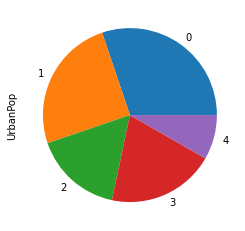

In [335]:
crime.groupby('Cluster1')['UrbanPop'].sum().plot(kind="pie")

__Cluster 4 has the minimum Urban Population where as Cluster 0 has maximum Urban Population.__

In [336]:
crime.groupby('Cluster1')['Murder'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
0,14.0,8.214286,3.944199,3.4,5.325,7.65,8.950,17.4
1,12.0,11.766667,2.842960,5.9,10.300,11.75,13.500,16.1
2,10.0,2.950000,1.534239,0.8,2.125,2.40,3.525,5.7
3,10.0,5.590000,2.231317,2.6,3.550,6.00,6.975,9.7
4,4.0,11.950000,3.068659,8.1,10.500,12.15,13.600,15.4


In [337]:
crime.groupby('Cluster1')['Murder'].sum()

Cluster1
0    115.0
1    141.2
2     29.5
3     55.9
4     47.8
Name: Murder, dtype: float64

<AxesSubplot:ylabel='Murder'>

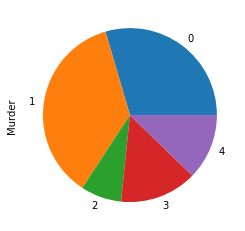

In [338]:
crime.groupby('Cluster1')['Murder'].sum().plot(kind="pie")

__Cluster 2 has the minimum murder rate where as Cluster 1 has maximum murder rate.__

In [339]:
crime.groupby('Cluster1')['Rape'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
0,14.0,22.842857,7.402361,8.3,18.975,23.10,26.725,38.7
1,12.0,28.933333,10.484476,15.8,21.950,25.05,36.475,46.0
2,10.0,11.510000,3.796621,7.3,9.350,11.00,12.425,20.2
3,10.0,17.270000,3.630136,11.1,15.250,16.45,20.250,22.9
4,4.0,26.700000,7.282399,16.1,24.875,29.40,31.225,31.9


In [340]:
crime.groupby('Cluster1')['Rape'].sum()

Cluster1
0    319.8
1    347.2
2    115.1
3    172.7
4    106.8
Name: Rape, dtype: float64

<AxesSubplot:ylabel='Rape'>

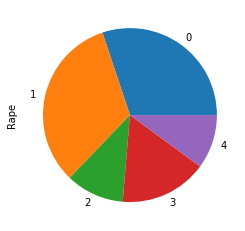

In [341]:
crime.groupby('Cluster1')['Rape'].sum().plot(kind="pie")

__Cluster 4 has the minimum Rape rate where as Cluster 1 has maximum Rape rate.__

In [342]:
crime.groupby('Cluster1')['Assault'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster1,,,,,,,,
0,14.0,173.285714,22.182559,145.0,156.75,167.5,189.50,211.0
1,12.0,257.916667,15.453498,236.0,249.00,254.5,266.25,285.0
2,10.0,62.700000,16.179891,45.0,49.25,56.5,78.75,86.0
3,10.0,112.400000,6.310485,102.0,109.00,111.5,118.75,120.0
4,4.0,316.500000,22.664216,294.0,298.50,317.5,335.50,337.0


In [343]:
crime.groupby('Cluster1')['Assault'].sum()

Cluster1
0    2426
1    3095
2     627
3    1124
4    1266
Name: Assault, dtype: int64

<AxesSubplot:ylabel='Assault'>

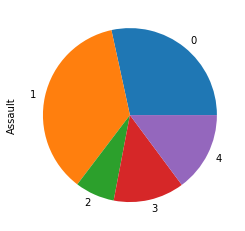

In [344]:
crime.groupby('Cluster1')['Assault'].sum().plot(kind="pie")

__Cluster 2 has the minimum Assault case Rate where as Cluster 1 has maximum Assault case Rate.__

In [345]:
print('City with Highest Crime Rate Rate')
print()
print(crime[crime['Cluster1']==1].City)
print()
print('---------------------------------------------------------------------')
print('City with Lowest Crime Rate')
print()
print(crime[crime['Cluster1']==2].City)

City with Highest Crime Rate Rate

0            Alabama
1             Alaska
4         California
7           Delaware
12          Illinois
17         Louisiana
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
39    South Carolina
Name: City, dtype: object

---------------------------------------------------------------------
City with Lowest Crime Rate

10           Hawaii
14             Iowa
18            Maine
22        Minnesota
28    New Hampshire
33     North Dakota
40     South Dakota
44          Vermont
47    West Virginia
48        Wisconsin
Name: City, dtype: object


# DBSCAN

In [346]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [349]:
ss=StandardScaler()
x_stand=ss.fit_transform(X)

In [350]:
x_stand

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [352]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_stand)
distances,indices = nbrs.kneighbors(x_stand)

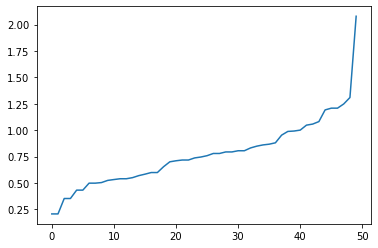

In [353]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [363]:

dbscan = DBSCAN(eps=1.25, min_samples=6)
dbscan.fit(x_stand)

DBSCAN(eps=1.25, min_samples=6)

In [364]:
y_pred2=pd.DataFrame(dbscan.labels_,columns=['Cluster 2'])

In [365]:
y_pred2.value_counts()

Cluster 2
 1           32
-1           12
 0            6
dtype: int64

__I am not going to depend on DBSCAN clustering because its cluster formation is less informational then Kmeans forms Clusters.__